<a href="https://colab.research.google.com/github/kyliestephens/DS1002/blob/main/Copy_of_Lab_FTX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS1002 Lab 1:  FTX

### Due Monday 1 April at noon

In this lab you will work with a dataset, writing python to generate the deliverables specified in the cells below.

> **FTX** was a cryptocurrency exchange founded by Sam Bankman-Fried that saw both a spectacular rise and collapse between 2021 and 2022. At one point it had a valuation of $32B. In November Bankman-Fried was found guilty on seven counts of fraud and conspiracy.  His sentencing hearing is today.

The dataset for this assignment covers that rise and fall from the viewpoint of daily stock closing prices for FTX (ticker symbol `FTT`).

Answer the questions below with the appropriate Python code.

**Put code and outputs in this notebook.**


## Group Submissions

As usual you may work in a group to complete this lab, with no more than 3 members in a group. Group members should be indicated in the cell below -- list both names and UVA computing IDs.

Each student should then submit **the same URL** for the lab in Canvas. (If a group has Member1, Member2, and Member3, only one member needs to save the completed work back to GitHub and all members should submit that URL for grading.)

In [1]:
#Kylie Stephens
#computing id: uqj5uw

## 1. Load Libraries & Data

https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv

Import any necessary libraries and load the remote CSV file below into a DataFrame. **Resolve any import issues you need to.**

In [39]:
import pandas as pd
import numpy as np
data1 = pd.read_csv('https://s3.amazonaws.com/ds1002-resources/data/ftx-2021-01-01--2023-12-31.csv', sep=';')

## 2. Get Summary Data

In code, display how many rows and columns are in the raw dataset.

In [40]:
rows, columns = data1.shape
print("The number of rows in this raw dataset are:", rows)
print("The number of columns in this raw data set are:", columns)

The number of rows in this raw dataset are: 741
The number of columns in this raw data set are: 11


In [41]:
#printing out data frame for reference in future questions
data1

,timeOpen,timeClose,timeHigh,timeLow,open,high,low,close,volume,marketCap,timestamp
0,2022-12-31T00:00:00.000Z,2022-12-31T23:59:59.999Z,2022-12-31T15:23:00.000Z,2022-12-31T00:21:00.000Z,0.838968,0.853502,0.835226,0.842688,3001502.06,2.771561e+08,2022-12-31T23:59:59.999Z
1,2022-12-30T00:00:00.000Z,2022-12-30T23:59:59.999Z,2022-12-30T04:22:00.000Z,2022-12-30T15:12:00.000Z,0.860193,0.864752,0.826643,0.839048,3608615.07,2.759588e+08,2022-12-30T23:59:59.999Z
2,2022-12-29T00:00:00.000Z,2022-12-29T23:59:59.999Z,2022-12-29T00:49:00.000Z,2022-12-29T21:03:00.000Z,0.885723,0.887118,0.843029,0.860231,3766979.57,2.829258e+08,2022-12-29T23:59:59.999Z
3,2022-12-28T00:00:00.000Z,2022-12-28T23:59:59.999Z,2022-12-28T00:20:00.000Z,2022-12-28T10:44:00.000Z,0.921162,0.925702,0.869842,0.886091,4192949.85,2.914310e+08,2022-12-28T23:59:59.999Z
4,2022-12-27T00:00:00.000Z,2022-12-27T23:59:59.999Z,2022-12-27T14:19:00.000Z,2022-12-27T19:12:00.000Z,0.931138,0.955402,0.916414,0.923668,4574953.05,3.037898e+08,2022-12-27T23:59:59.999Z
...,...,...,...,...,...,...,...,...,...,...,...
736,2021-01-06T00:00:00.000Z,2021-01-06T23:59:59.999Z,2021-01-06T23:59:03.000Z,2021-01-06T01:41:03.000Z,8.671285,9.390797,8.425946,9.390797,31404627.93,8.859932e+08,2021-01-06T23:59:59.999Z
737,2021-01-05T00:00:00.000Z,2021-01-05T23:59:59.999Z,2021-01-05T22:44:03.000Z,2021-01-05T06:19:03.000Z,7.528216,8.714947,7.081120,8.664688,49479278.39,8.174869e+08,2021-01-05T23:59:59.999Z
738,2021-01-04T00:00:00.000Z,2021-01-04T23:59:59.999Z,2021-01-04T06:40:03.000Z,2021-01-04T10:18:03.000Z,6.948680,7.632146,6.358218,7.514079,40526109.15,7.089305e+08,2021-01-04T23:59:59.999Z
739,2021-01-03T00:00:00.000Z,2021-01-03T23:59:59.999Z,2021-01-03T16:25:03.000Z,2021-01-03T00:25:03.000Z,6.201133,7.007523,6.171834,6.923968,31046652.87,6.532553e+08,2021-01-03T23:59:59.999Z


## 3. Clean and Organize the Data

Check for data quality.

- Resolve any empty values or duplicate rows.
- Order the data properly if necessary.
- Drop the following columns and save the dataframe: `timeOpen`, `timeClose`, `timeHigh`, `timeLow`, `marketCap`



In [42]:
#Resolve Empty Values & Duplicates & Order Time Stamp column correctly
data_nodupes = data1.drop_duplicates()
cleaned_data = data_nodupes.dropna()
cleaned_data = cleaned_data.sort_values(by='timestamp', ascending=True)
cleaned_data['timestamp'] = pd.to_datetime(cleaned_data['timestamp'])
cleaned_data = cleaned_data.drop(['timeOpen', 'timeClose', 'timeHigh', 'timeLow', 'marketCap'], axis = 1)
question3_data = cleaned_data.copy()
question3_data

,open,high,low,close,volume,timestamp
739,6.201133,7.007523,6.171834,6.923968,31046652.87,2021-01-03 23:59:59.999000+00:00
738,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04 23:59:59.999000+00:00
737,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05 23:59:59.999000+00:00
736,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06 23:59:59.999000+00:00
735,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07 23:59:59.999000+00:00
...,...,...,...,...,...,...
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27 23:59:59.999000+00:00
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28 23:59:59.999000+00:00
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29 23:59:59.999000+00:00
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30 23:59:59.999000+00:00


Now display the first 10 rows of the cleaned dataset.

In [43]:
desiredrows = question3_data.head(10)
desiredrows

,open,high,low,close,volume,timestamp
739,6.201133,7.007523,6.171834,6.923968,3.104665e+07,2021-01-03 23:59:59.999000+00:00
738,6.948680,7.632146,6.358218,7.514079,4.052611e+07,2021-01-04 23:59:59.999000+00:00
737,7.528216,8.714947,7.081120,8.664688,4.947928e+07,2021-01-05 23:59:59.999000+00:00
736,8.671285,9.390797,8.425946,9.390797,3.140463e+07,2021-01-06 23:59:59.999000+00:00
735,9.386493,10.004872,9.215244,9.562131,4.630334e+07,2021-01-07 23:59:59.999000+00:00
734,9.569239,9.726429,8.452265,9.380988,4.228627e+07,2021-01-08 23:59:59.999000+00:00
733,9.370450,9.636120,8.728044,9.570511,2.849895e+07,2021-01-09 23:59:59.999000+00:00
732,9.571917,9.944797,8.657147,9.308809,3.101239e+07,2021-01-10 23:59:59.999000+00:00
731,9.298315,9.298315,7.126050,8.610997,1.013024e+08,2021-01-11 23:59:59.999000+00:00
730,8.615143,9.097479,8.040916,8.381133,2.674536e+07,2021-01-12 23:59:59.999000+00:00


## 4. Calculate Daily Gains/Losses

Using Pandas, add a new column named `["close_change"]` to the dataframe that calculates the difference between daily closing prices for FTX. This will result in positive (growth) and negative (loss) values.

Note:
- Be careful about how you calculate this. Each row should calculate that difference from the row above it, which must be the previous calendar day.
- Hint: This is not complicated and does not require a for-loop.  See the Pandas review notebook for reference.

In [44]:
#close is the column that displays the daily closing prices
#diff function calculates the difference between consecutive daily closing prices for FTW
cleaned_data['close_change'] = cleaned_data['close'].diff()
#this saves the updated DF to a new CSV file
cleaned_data.to_csv('updated_dataset.csv', index=False)
question4_data = cleaned_data.copy()
question4_data

,open,high,low,close,volume,timestamp,close_change
739,6.201133,7.007523,6.171834,6.923968,31046652.87,2021-01-03 23:59:59.999000+00:00,NaN
738,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04 23:59:59.999000+00:00,0.590111
737,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05 23:59:59.999000+00:00,1.150608
736,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06 23:59:59.999000+00:00,0.726110
735,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07 23:59:59.999000+00:00,0.171334
...,...,...,...,...,...,...,...
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27 23:59:59.999000+00:00,-0.007028
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28 23:59:59.999000+00:00,-0.037577
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29 23:59:59.999000+00:00,-0.025860
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30 23:59:59.999000+00:00,-0.021183


## 5. Identify Growth Days

Based on the daily change in closing prices calculated above, identify the top 10 days of positive growth for FTX.

Display your results in a table showing both the rate of change and their dates.

In [45]:
top_10_positive_growth = question4_data.nlargest(10, 'close_change')
top_10_days = top_10_positive_growth.drop(['open', 'high', 'low', 'close', 'volume'], axis = 1)
top_10_days

,timestamp,close_change
492,2021-09-01 23:59:59.999000+00:00,16.677156
487,2021-09-06 23:59:59.999000+00:00,9.800320
692,2021-02-19 23:59:59.999000+00:00,8.335900
592,2021-05-24 23:59:59.999000+00:00,6.333923
673,2021-03-09 23:59:59.999000+00:00,5.529699
515,2021-08-09 23:59:59.999000+00:00,5.325192
485,2021-09-08 23:59:59.999000+00:00,5.239728
625,2021-04-26 23:59:59.999000+00:00,4.504385
611,2021-05-05 23:59:59.999000+00:00,4.488174
311,2022-02-28 23:59:59.999000+00:00,4.401841


## 6. Calculate the Percentage Rate of Change

Next, create a new column named `["rate_of_change"]` based on `["close_change"]`.

Use the Pandas Review notebook for reference. Again, this is an easy operation in Pandas and does not require a for-loop.

In [46]:
cleaned_data['rate_of_change'] = cleaned_data['close_change'] / cleaned_data['close']
question6_data = cleaned_data.copy()
question6_data

,open,high,low,close,volume,timestamp,close_change,rate_of_change
739,6.201133,7.007523,6.171834,6.923968,31046652.87,2021-01-03 23:59:59.999000+00:00,NaN,NaN
738,6.948680,7.632146,6.358218,7.514079,40526109.15,2021-01-04 23:59:59.999000+00:00,0.590111,0.078534
737,7.528216,8.714947,7.081120,8.664688,49479278.39,2021-01-05 23:59:59.999000+00:00,1.150608,0.132793
736,8.671285,9.390797,8.425946,9.390797,31404627.93,2021-01-06 23:59:59.999000+00:00,0.726110,0.077321
735,9.386493,10.004872,9.215244,9.562131,46303336.73,2021-01-07 23:59:59.999000+00:00,0.171334,0.017918
...,...,...,...,...,...,...,...,...
4,0.931138,0.955402,0.916414,0.923668,4574953.05,2022-12-27 23:59:59.999000+00:00,-0.007028,-0.007609
3,0.921162,0.925702,0.869842,0.886091,4192949.85,2022-12-28 23:59:59.999000+00:00,-0.037577,-0.042407
2,0.885723,0.887118,0.843029,0.860231,3766979.57,2022-12-29 23:59:59.999000+00:00,-0.025860,-0.030061
1,0.860193,0.864752,0.826643,0.839048,3608615.07,2022-12-30 23:59:59.999000+00:00,-0.021183,-0.025246


## 7. Identify Days of Greatest Percentage Change

Based on the rate change column calculated above, identify the top 5 days of greatest positive rate change, and the top 5 days of greatest negative rate change.

Display your results in a table showing both the rate of change and their dates.

In [47]:
top_5_postitive_rate = question6_data.nlargest(5, 'rate_of_change')
top_5_pdays = top_5_postitive_rate.drop(['open', 'high', 'low', 'close', 'volume', 'close_change'], axis = 1)
top_5_negative_rate = question6_data.nsmallest(5, 'rate_of_change')
top_5_ndays = top_5_negative_rate.drop(['open', 'high', 'low', 'close', 'volume', 'close_change'], axis = 1)
combined_days = pd.concat([top_5_pdays, top_5_ndays], axis=0)
combined_days

,timestamp,rate_of_change
53,2022-11-10 23:59:59.999000+00:00,0.345844
492,2021-09-01 23:59:59.999000+00:00,0.255856
692,2021-02-19 23:59:59.999000+00:00,0.241081
24,2022-12-09 23:59:59.999000+00:00,0.197978
48,2022-11-15 23:59:59.999000+00:00,0.196714
55,2022-11-08 23:59:59.999000+00:00,-3.012064
54,2022-11-09 23:59:59.999000+00:00,-1.398869
50,2022-11-13 23:59:59.999000+00:00,-0.402640
597,2021-05-19 23:59:59.999000+00:00,-0.379502
52,2022-11-11 23:59:59.999000+00:00,-0.357670


## 8. Plot the Data

Create two separate plots of the data -- one for the daily closing price and one for the daily gains/losses. These can be histograms or line plots.

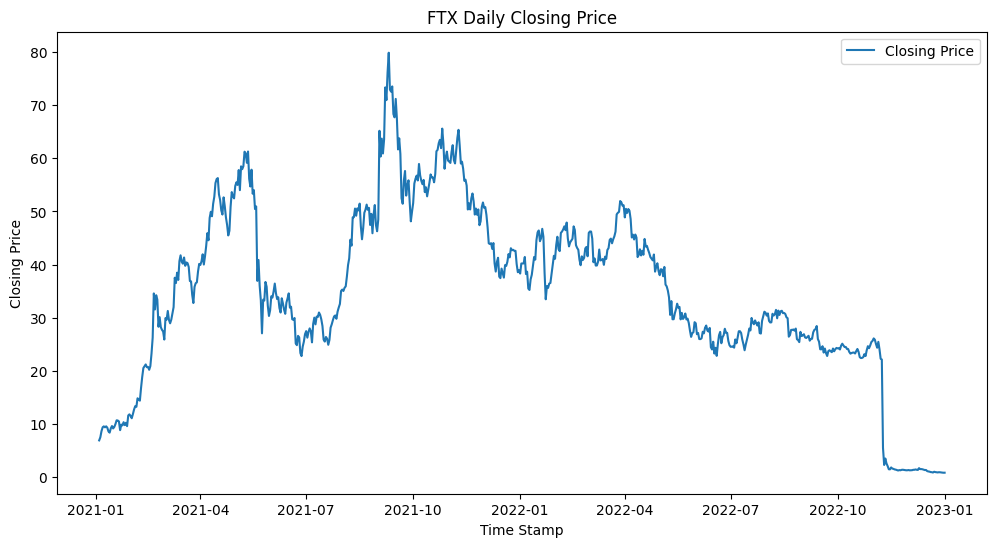

In [48]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['timestamp'], cleaned_data['close'], label='Closing Price')
plt.xlabel('Time Stamp')
plt.ylabel('Closing Price')
plt.title('FTX Daily Closing Price')
plt.legend()
plt.show()

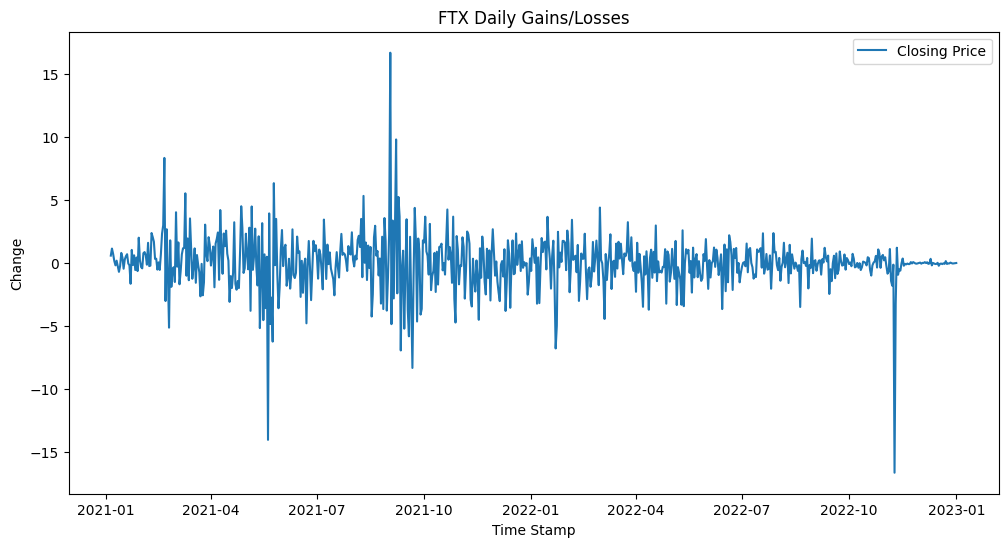

In [49]:
plt.figure(figsize=(12, 6))
plt.plot(cleaned_data['timestamp'], cleaned_data['close_change'], label='Closing Price')
plt.xlabel('Time Stamp')
plt.ylabel('Change')
plt.title('FTX Daily Gains/Losses')
plt.legend()
plt.show()

Combine the two plots from above into a single plot, displaying both together. Your plot should have two Y-axis scales, should differentiate the two values by color, and should include a legend.

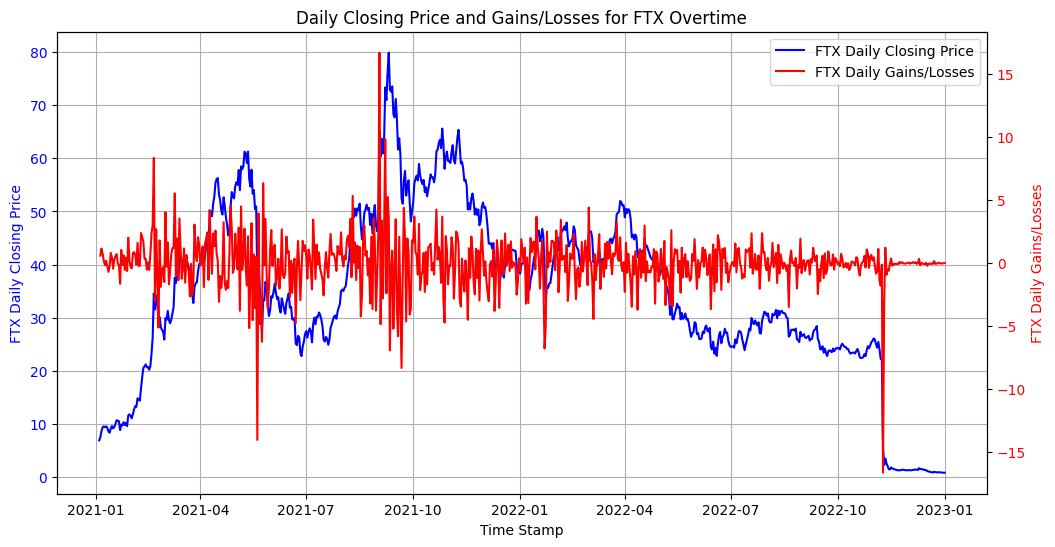

In [50]:
fig, ax1 = plt.subplots(figsize=(12, 6))
ax1.plot(cleaned_data['timestamp'], cleaned_data['close'], color='blue', label='FTX Daily Closing Price')
ax1.set_xlabel('Time Stamp')
ax1.set_ylabel('FTX Daily Closing Price', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')
ax1.grid(True)
ax2 = ax1.twinx()
ax2.plot(cleaned_data['timestamp'], cleaned_data['close_change'], color='red', label='FTX Daily Gains/Losses')
ax2.set_ylabel('FTX Daily Gains/Losses', color='red')
ax2.tick_params(axis='y', labelcolor='red')
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines1 + lines2, labels1 + labels2, loc='upper right')
plt.title('Daily Closing Price and Gains/Losses for FTX Overtime')
plt.show()